In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
imPth = r'/content/cm.jpg'
img = plt.imread(imPth)

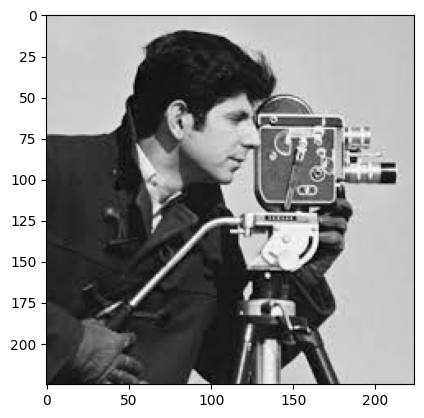

In [ ]:
plt.imshow(img,cmap='gray')

In [ ]:
def imshow_gray(title, img):
    plt.figure(figsize=(5,4))
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

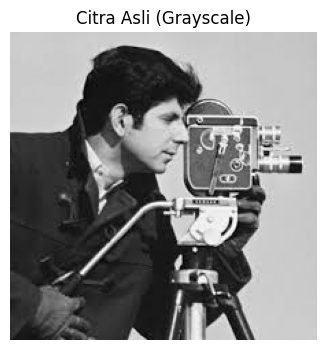

Ukuran citra: (225, 224)


In [ ]:
# Ganti path gambar sesuai kebutuhan
img = cv2.imread(imPth, cv2.IMREAD_GRAYSCALE)
assert img is not None, "Gagal memuat gambar. Pastikan path benar."

imshow_gray("Citra Asli (Grayscale)", img)
print("Ukuran citra:", img.shape)


### Tugas Praktikum No 1
- Coba 3 kombinasi parameter:
   - (ksize=3, σ=0), (ksize=5, σ=1.0), (ksize=7, σ=1.4)
- Bandingkan hasil tepi akhir (pakai `cv2.Canny`) dan tuliskan pengamatan:
   - tepi halus vs hilangnya detail,
   - perubahan jumlah tepi palsu.

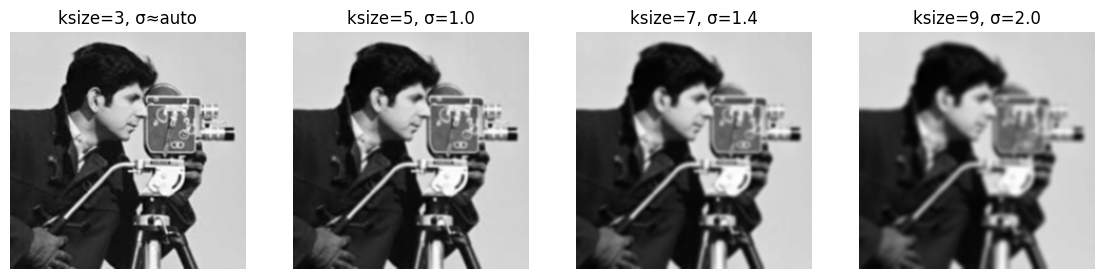

In [ ]:
blur_3_0 = cv2.GaussianBlur(img, (3,3), 0)      # sigma otomatis dari ksize=3
blur_5_1 = cv2.GaussianBlur(img, (5,5), 1.0)    # sigma=1.0
blur_7_14 = cv2.GaussianBlur(img, (7,7), 1.4)   # contoh umum di Canny awal
blur_9_2 = cv2.GaussianBlur(img, (9,9), 2.0)

fig, axes = plt.subplots(1,4, figsize=(14,4))
for ax, im, title in zip(
    axes,
    [blur_3_0, blur_5_1, blur_7_14, blur_9_2],
    ["ksize=3, σ≈auto", "ksize=5, σ=1.0", "ksize=7, σ=1.4", "ksize=9, σ=2.0"]
):
    ax.set_title(title); ax.imshow(im, cmap='gray'); ax.axis('off')
plt.show()

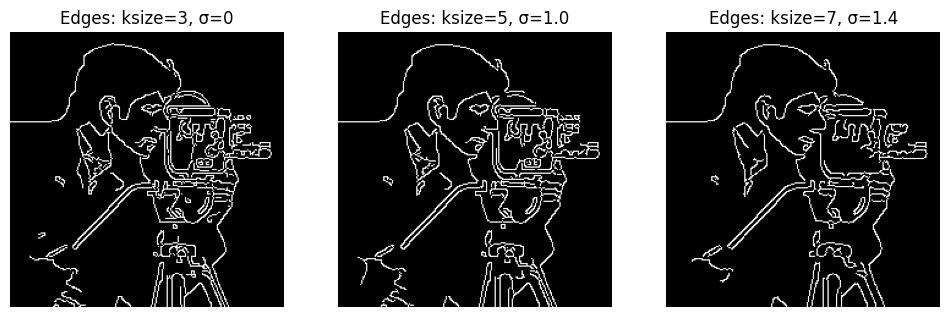

In [ ]:
edges_3_0 = cv2.Canny(blur_3_0, 100, 200)
edges_5_1 = cv2.Canny(blur_5_1, 100, 200)
edges_7_14 = cv2.Canny(blur_7_14, 100, 200)

# Tampilkan hasil edge detection
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, im, title in zip(
    axes,
    [edges_3_0, edges_5_1, edges_7_14],
    ["Edges: ksize=3, σ=0", "Edges: ksize=5, σ=1.0", "Edges: ksize=7, σ=1.4"]
):
    ax.set_title(title)
    ax.imshow(im, cmap='gray')
    ax.axis('off')
plt.show()

# **Pengamatan**

**tepi halus vs detail hilang**:

**-(ksize=3)**: tepi terlihat tajam dan detail yang jelas, detail kanera masih terdeseksi dengan jelas, tapi cenderung terlihat kasar karena blurring minimal

**-(ksize=5)**: pada gambar ini tepi mulai terlihat halus jika dibandingkan dengan gambar pertama dengan pengurangan noise kecil yang membuat garis terlihat lebih mulus, namun ada beberapa sedikit detail yang hilang.

**-(ksize=7)**: tepi ini terlihat paling halus, namun kehilangan banyak detail yang signifikan seperti wajah, rambut, dan banyak pada bagian kamera

**perubahan jumlah tepi palsu**:

- **(ksize=3)**: Jumlah tepi palsu paling tinggi karena blurring rendah tidak cukup menyaring noise atau variasi acak di gambar asli.

- **(ksize=5)**:Jumlah tepi palsu berkurang secara moderat. Blurring yang lebih kuat menghilangkan sebagian noise kecil, sehingga tepi palsu seperti garis acak di rambut atau sekitar objek berkurang.

- **(ksize=7)**:Tepi palsu paling sedikit, hampir tidak ada garis ekstra yang tidak relevan karena blurring kuat menyaring hampir semua noise.

###Tugas Praktikum No 3

1. Bandingkan hasil **magnitudo gradien** dan **hasil NMS** — seberapa besar perbedaan ketebalan garisnya?
2. Ubah nilai arah gradien menjadi lebih kasar (misalnya hanya 0°, 90°). Bagaimana dampaknya terhadap hasil?
3. Apakah NMS bekerja sempurna pada citra ber-noise tinggi?
4. Mengapa hasil NMS bisa menjadi dasar yang penting untuk tahap **Hysteresis Thresholding**?

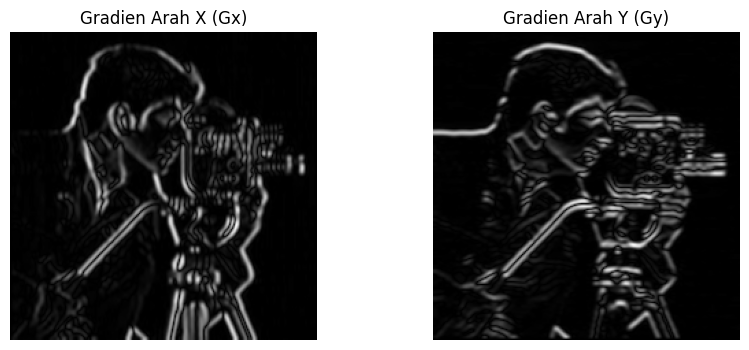

In [ ]:
blur = cv2.GaussianBlur(img, (5,5), 1.4)

# Asumsikan citra hasil Gaussian sudah ada
blur = cv2.GaussianBlur(img, (5,5), 1.4)

# Operator Sobel
Gx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)  # Turunan arah X
Gy = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)  # Turunan arah Y

# Visualisasi hasil
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].imshow(np.abs(Gx), cmap='gray')
axes[0].set_title("Gradien Arah X (Gx)")
axes[0].axis('off')

axes[1].imshow(np.abs(Gy), cmap='gray')
axes[1].set_title("Gradien Arah Y (Gy)")
axes[1].axis('off')
plt.show()

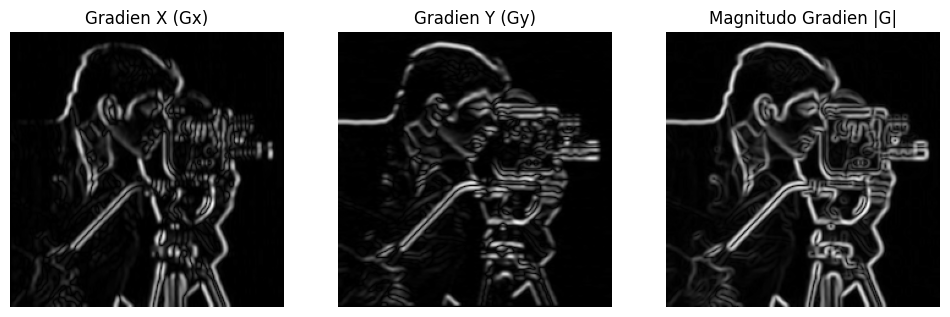

In [ ]:
# Hitung gradien arah X dan Y
Gx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)

# Hitung magnitudo dan arah gradien
magnitude = np.sqrt(Gx**2 + Gy**2)
direction = np.arctan2(Gy, Gx) * 180 / np.pi  # konversi ke derajat

# Tampilkan
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].imshow(np.abs(Gx), cmap='gray')
axes[0].set_title('Gradien X (Gx)')
axes[0].axis('off')

axes[1].imshow(np.abs(Gy), cmap='gray')
axes[1].set_title('Gradien Y (Gy)')
axes[1].axis('off')

axes[2].imshow(magnitude, cmap='gray')
axes[2].set_title('Magnitudo Gradien |G|')
axes[2].axis('off')

plt.show()

In [ ]:
# Asumsi sudah ada variabel magnitude dan direction dari tahap Gradient

def non_max_suppression(magnitude, direction):
    H, W = magnitude.shape
    output = np.zeros((H, W), dtype=np.float32)

    # Ubah arah ke rentang [0,180)
    angle = direction % 180

    for i in range(1, H-1):
        for j in range(1, W-1):
            q = 255
            r = 255

            # 0° (horizontal)
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = magnitude[i, j+1]
                r = magnitude[i, j-1]
            # 45° (diagonal ↘)
            elif (22.5 <= angle[i,j] < 67.5):
                q = magnitude[i+1, j-1]
                r = magnitude[i-1, j+1]
            # 90° (vertikal)
            elif (67.5 <= angle[i,j] < 112.5):
                q = magnitude[i+1, j]
                r = magnitude[i-1, j]
            # 135° (diagonal ↙)
            elif (112.5 <= angle[i,j] < 157.5):
                q = magnitude[i-1, j-1]
                r = magnitude[i+1, j+1]

            # Simpan nilai jika maksimum lokal
            if (magnitude[i,j] >= q) and (magnitude[i,j] >= r):
                output[i,j] = magnitude[i,j]
            else:
                output[i,j] = 0
    return output

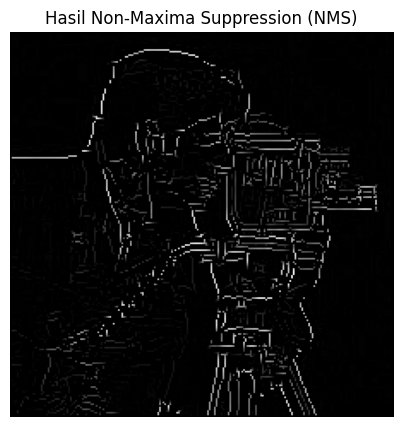

In [ ]:
nms_result = non_max_suppression(magnitude, direction)

plt.figure(figsize=(6,5))
plt.title("Hasil Non-Maxima Suppression (NMS)")
plt.imshow(nms_result, cmap='gray')
plt.axis('off')
plt.show()

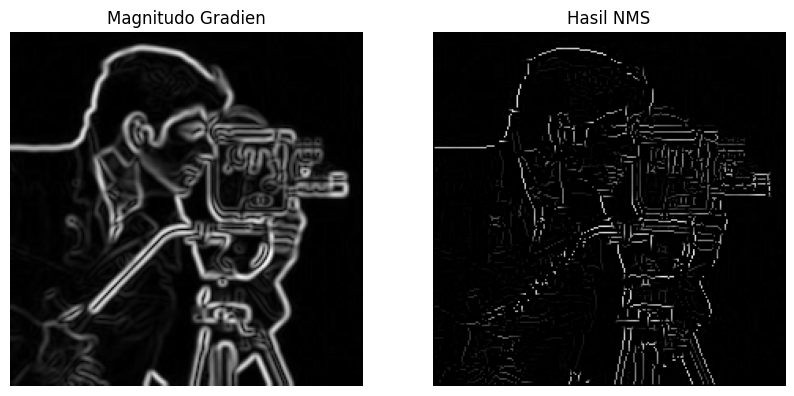

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(magnitude, cmap='gray')
axes[0].set_title('Magnitudo Gradien')
axes[0].axis('off')

axes[1].imshow(nms_result, cmap='gray')
axes[1].set_title('Hasil NMS')
axes[1].axis('off')

plt.show()

# 1. Bandingkan hasil **magnitudo gradien** dan **hasil NMS** — seberapa besar perbedaan ketebalan garisnya?

**Hasil Magnitudo Gradien**: Dari gambar diatas Magnitudo Gradien menunjukkan tepi yang relatif tebal Garis-garis seperti kontur wajah, kamera, dan tripod terlihat sebagai cluster piksel yang lebih lebar, karena magnitudo hanya menghitung kekuatan gradien tanpa penipisan.

**Hasil NMS**: Pada gambar diatas, NMS menghasilkan garis tepi yang jauh lebih tipis, NMS hanya mempertahankan piksel maksimum lokal sepanjang arah gradien.

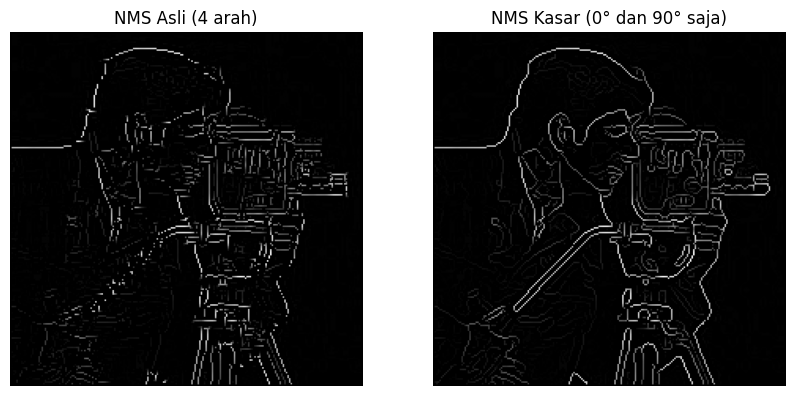

In [ ]:
def non_max_suppression_coarse(magnitude, direction):
    H, W = magnitude.shape
    output = np.zeros((H, W), dtype=np.float32)

    # Ubah arah ke rentang [0,180)
    angle = direction % 180

    # Bulatkan ke 0° atau 90° saja
    # Misal: <45° atau >135° -> 0°; 45°-135° -> 90°
    for i in range(1, H-1):
        for j in range(1, W-1):
            q = 255
            r = 255

            if (0 <= angle[i,j] < 45) or (135 <= angle[i,j] <= 180):
                # 0° (horizontal)
                q = magnitude[i, j+1]
                r = magnitude[i, j-1]
            else:
                # 90° (vertikal)
                q = magnitude[i+1, j]
                r = magnitude[i-1, j]

            if (magnitude[i,j] >= q) and (magnitude[i,j] >= r):
                output[i,j] = magnitude[i,j]
            else:
                output[i,j] = 0
    return output

nms_coarse = non_max_suppression_coarse(magnitude, direction)

# Tampilkan perbandingan dengan NMS asli
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(nms_result, cmap='gray')
axes[0].set_title('NMS Asli (4 arah)')
axes[0].axis('off')

axes[1].imshow(nms_coarse, cmap='gray')
axes[1].set_title('NMS Kasar (0° dan 90° saja)')
axes[1].axis('off')

plt.show()

# **2. Ubah nilai arah gradien menjadi lebih kasar (misalnya hanya 0°, 90°). Bagaimana dampaknya terhadap hasil?**

Pembulatan arah kasar mengurangi akurasi pada tepi non-ortogonal, menyebabkan hilangnya detail dan potensi artefak seperti garis ekstra pendek. Pada gambar diatas terlihat jelas di area kamera, di mana detail diagonal menjadi kurang terdefinisi.

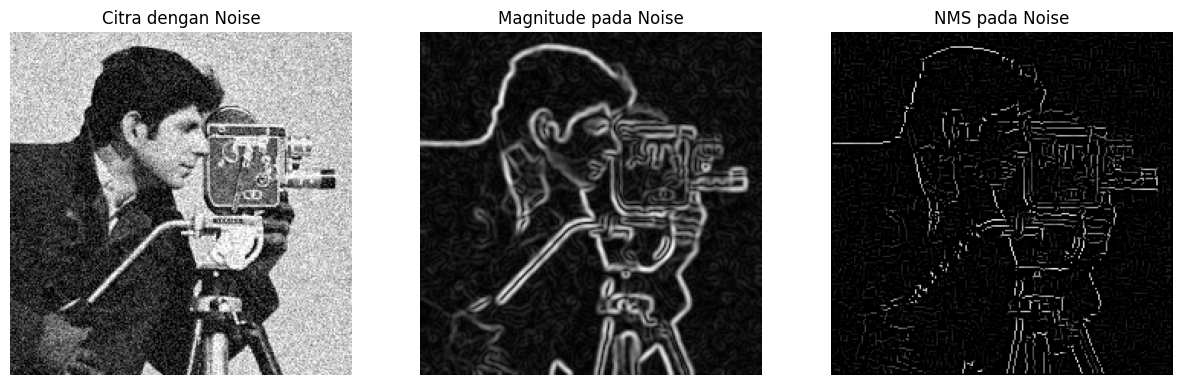

In [ ]:
# Cell untuk menambahkan noise dan tes NMS pada citra ber-noise (Poin 3)
# Tambahkan Gaussian noise ke gambar asli sebelum blurring

# Fungsi untuk tambah noise
def add_gaussian_noise(image, mean=0, std=25):
    noise = np.random.normal(mean, std, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

# Tambah noise ke img grayscale
noisy_img = add_gaussian_noise(img)

# Ulangi proses: Blur, Sobel, Magnitude, Direction, NMS
blur_noisy = cv2.GaussianBlur(noisy_img, (5,5), 1.4)
Gx_noisy = cv2.Sobel(blur_noisy, cv2.CV_64F, 1, 0, ksize=3)
Gy_noisy = cv2.Sobel(blur_noisy, cv2.CV_64F, 0, 1, ksize=3)
magnitude_noisy = np.sqrt(Gx_noisy**2 + Gy_noisy**2)
direction_noisy = np.arctan2(Gy_noisy, Gx_noisy) * 180 / np.pi
nms_noisy = non_max_suppression(magnitude_noisy, direction_noisy)

# Tampilkan
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(noisy_img, cmap='gray')
axes[0].set_title('Citra dengan Noise')
axes[0].axis('off')

axes[1].imshow(magnitude_noisy, cmap='gray')
axes[1].set_title('Magnitude pada Noise')
axes[1].axis('off')

axes[2].imshow(nms_noisy, cmap='gray')
axes[2].set_title('NMS pada Noise')
axes[2].axis('off')

plt.show()

# **3. Apakah NMS bekerja sempurna pada citra ber-noise tinggi?**

Tidak, NMS tidak bekerja sempurna pada citra ber-noise tinggi, seperti yang terlihat pada gambar diatas.

NMS membantu menipiskan tapi tidak membersihkan noise tinggi, dan memberikan hasil berantakan.

# **4. Mengapa hasil NMS bisa menjadi dasar yang penting untuk tahap Hysteresis Thresholding?**

Hasil NMS penting sebagai dasar Hysteresis Thresholding karena NMS menghasilkan tepi yang sudah tipis dan maksimum lokal, yang memudahkan proses thresholding ganda untuk membedakan tepi kuat, lemah, dan noise.